# Alura - Imersão Dados 3ª Edição

Notebook criado para a quarta aula e resolução de desafios da imersão de dados realizada pela [Alura](https://www.alura.com.br/imersao-dados).

Os notebooks das outras aulas podem ser encontrados no meu respositório do [Github](https://github.com/claudineipereira/alura-imersaodados3).

## Aula 4: Merge e análise de resultados

Nesta aula, além de utilizar os dados dos experimentos, vamos utilizar os dados dos resultados.

In [2]:
# importa o pandas e lê os dados em csv a partir de uma url
# importa seaborn para os gráficos
# importa matplotlib para configurar os gráficos
# importa o numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set()

url_experimentos = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
url_resultados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true'

dados_experimentos = pd.read_csv(url_experimentos, compression='zip')
dados_resultados = pd.read_csv(url_resultados)

In [3]:
# renomeia coluna 'droga' do dataframe de experimentos
mapa = {'droga':'composto'}
dados_experimentos.rename(columns=mapa, inplace=True)

### Mostra as 5 primeiras entradas do dataframe de experimentos

In [4]:
dados_experimentos.head()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


### Mostra as 5 primeiras entradas do dataframe de resultados

In [5]:
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Mostra o mecanismo de ação mais ativado

In [6]:
# contagem_moa = dados_resultados.drop('id', axis=1).sum().sort_values(ascending=False)
contagem_moa = dados_resultados.select_dtypes('int64').sum().sort_values(ascending=False)
contagem_moa

nfkb_inhibitor                                832
proteasome_inhibitor                          726
cyclooxygenase_inhibitor                      435
dopamine_receptor_antagonist                  424
serotonin_receptor_antagonist                 404
                                             ... 
elastase_inhibitor                              6
steroid                                         6
atm_kinase_inhibitor                            6
erbb2_inhibitor                                 1
atp-sensitive_potassium_channel_antagonist      1
Length: 206, dtype: int64

### Mostra quantos mecanismos de ação cada experimento ativou

In [7]:
dados_resultados.drop('id', axis=1).sum(axis=1)

0        1
1        0
2        3
3        0
4        1
        ..
23809    1
23810    1
23811    0
23812    1
23813    0
Length: 23814, dtype: int64

### Junção (merge) das bases de dados

Junta as bases de dados, criando um novo dataframe com as colunas selecionadas. Documentação: [Merge, join, concatenate and compare](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

Aqui criamos duas novas colunas na base de dados de resultados, uma com a soma dos mecanismos de ação que cada experimento ativou, chamada *n_moa*, e outra coluna que mostra se algum mecanismo de ação foi ou não ativado, chamada *ativo_moa*. 

Por fim, juntamos os dataframes por *id* e criamos um novo dataframe com as colunas criadas anteriormente e mostramos as 5 primeiras entradas.

In [8]:
# Cria uma coluna com a soma dos mecanismos de ação que
# cada experimento ativou
dados_resultados['n_moa'] = dados_resultados.drop(
    'id', axis=1).sum(axis=1)

In [9]:
# dados_resultados['n_moa']

In [10]:
# Cria uma coluna que mostra se algum mecanismo de ação
# foi ou não ativado
dados_resultados['ativo_moa'] = dados_resultados['n_moa'] != 0

In [11]:
# dados_resultados['ativo_moa']

In [12]:
# combina os dataframes
dados_combinados = pd.merge(dados_experimentos, dados_resultados[['id', 'n_moa', 'ativo_moa']], on='id')

In [13]:
dados_combinados.head()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,...,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


Em seguida, confirmamos que nenhum experimento com controle ativou mecanismos de ação. Para isto, utilizamos a função *query* no dataframe combinado:

```python
dados_combinados.query('tratamento == "com_controle"')['ativo_moa'].value_counts()
```

In [14]:
dados_combinados.query('tratamento == "com_controle"'
                      )['ativo_moa'].value_counts()

False    1866
Name: ativo_moa, dtype: int64

Ainda utilizando a função *query*, verificamos a proporção de experimentos que receberam algum composto e ativaram ou não mecanismos de ação. 

```python
dados_combinados.query('tratamento == "com_droga"')['ativo_moa'].value_counts()
```

In [15]:
dados_combinados.query('tratamento == "com_droga"'
                      )['ativo_moa'].value_counts()

True     14447
False     7501
Name: ativo_moa, dtype: int64

#### Gráfico com os 05 principais compostos

Aqui plotamos um gráfico que mostra a ação dos 05 principais compostos no grupo de expressão gênica *g-0*:

In [35]:
composto_principal = dados_combinados['composto'].value_counts().index[:5]

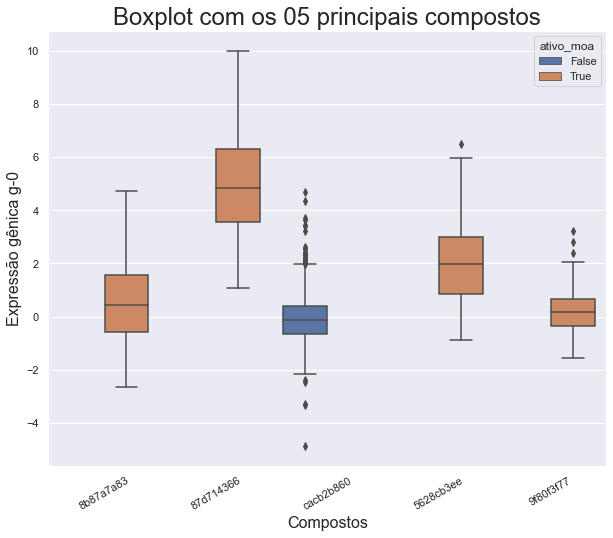

In [37]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(data=dados_combinados.query(
                'composto in @composto_principal'), y='g-0', 
                 x='composto', hue='ativo_moa')
ax.set_title('Boxplot com os 05 principais compostos', fontsize=24)
ax.set_xlabel('Compostos', fontsize=16)
ax.set_ylabel('Expressão gênica g-0', fontsize=16)
plt.setp(ax.get_xticklabels(), rotation=30)
plt.show()

## Desafios da Aula 04

### Desafio 01

#### Encontrar o top 10 das ações do MOA (inibidor, agonista, etc)

### Desafio 02

#### Criar a coluna *eh_controle* para quando na linha *tratamento == com_controle*

### Desafio 03

#### Criar três colunas para indicar o tempo 24, 48 e 72 horas

### Desafio 04

#### Estudar sobre combinações de dataframes

### Desafio 05

#### Escolher uma droga e comparar com controle

### Desafio 06

#### Descobrir se temos algum composto que, dependendo da configuração do experimento, ativa ou não ativa algum MOA

### Desafio 07

#### Descobrir se temos algum composto que, dependendo da configuração do experimento, ativa MOA's diferentes

### Desafio 08

#### Resumo do que foi aprendido
